In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! Packages `requests` and `urllib` can both do the job)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

In [27]:
data = np.loadtxt("climate.txt")

# --- Separate points with T<0 and T>=0 ---
data_T_min0 = data[np.where(data[:,1]<0)]
data_T_mag0 = data[np.where(data[:,1]>=0)]

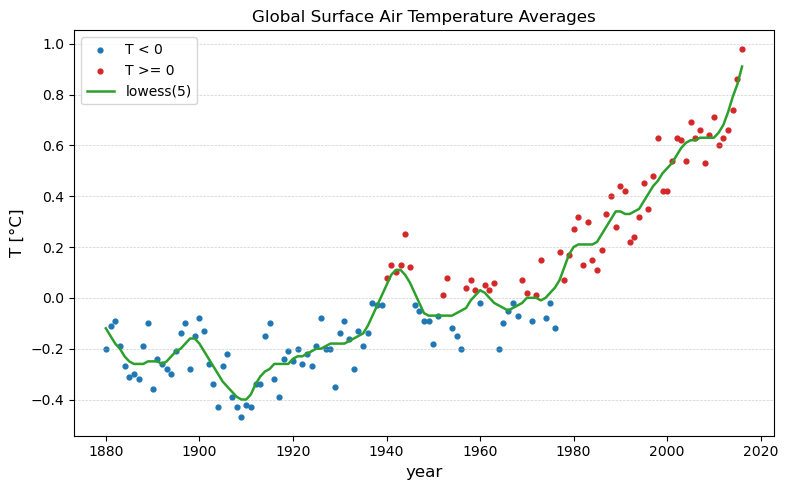

In [29]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# --- Data scatter plot ---
ax.scatter(data_T_min0[:,0], data_T_min0[:,1], c='C0', s=12, label=r"T < 0")
ax.scatter(data_T_mag0[:,0], data_T_mag0[:,1], c='C3', s=12, label=r"T >= 0")

# --- Smoothed data line plot ---
ax.plot(data[:,0], data[:,2], c='C2', linewidth=1.8, label=r"lowess(5)")

ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

ax.set_title(r"Global Surface Air Temperature Averages")
ax.set_xlabel(r"year", fontsize=12)
ax.set_ylabel(r"T [°C]", fontsize=12)

#plt.xlim(data[0,0],data[len(data)-1,0])
#plt.ylim(min(data[:,1]),max(data[:,1]))

ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt` file in the class repository
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [32]:
f = open("shore_leave.txt", "r")

# --- Dictionary for word frequencies ---
freq = {}

for line in f:
    # convert all to lowercase
    line = line.lower()
    
    # remove punctuation
    for p in [".", ",", "!", "?", ":", ";", "(", ")", '"', "'"]:
        line = line.replace(p, "")
    
    # split into words
    words = line.split()
    
    # update frequency dictionary
    for w in words:
        freq[w] = freq.get(w,0) + 1.

f.close()

#### Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

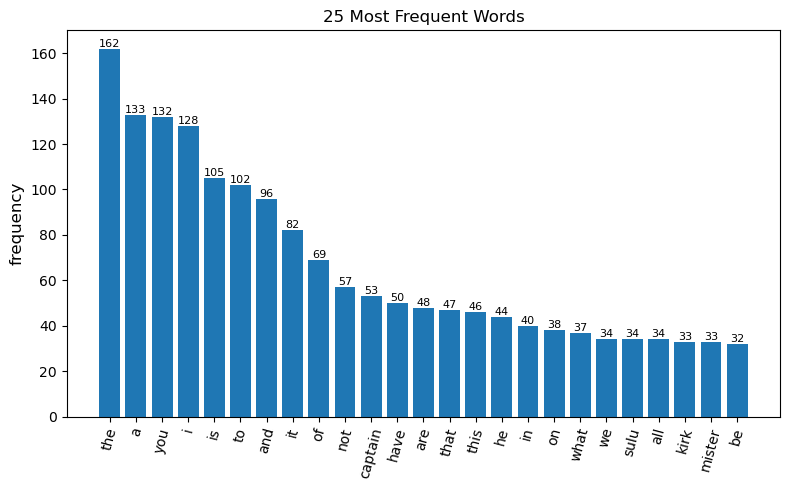

In [35]:
# sort the dictionary by decrescent value
sorted_freq = sorted(freq.items(), key=lambda p: p[1], reverse=True)

# extract the top 25 words and their counts
top25_words  = [w for w, c in sorted_freq[:25]]
top25_counts = [c for w, c in sorted_freq[:25]]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# --- Bar plot ---
bar_container = ax.bar(top25_words, top25_counts)

ax.set_ylabel('frequency', fontsize=12)
ax.set_title('25 Most Frequent Words')

# rotate x labels
ax.tick_params(axis='x', rotation=75)

# add labels above each bar (frequency)
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8)

plt.tight_layout()
plt.show()